In [1]:
import sys

sys.path.insert(0, r'd:\_NUU\2018\machine\skulls')
import data_dictionary

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
total_time = time.time()

In [24]:
start_time = time.time()
dd = data_dictionary.load_data(file_path='d:\\_NUU\\2018\\machine\\'
                                         'skulls\\init_data\\skulls.scv')
print(f"{time.time() - start_time:.10} secs")

В файле с белым вином: 200 2 записей, 
0.004326105118 secs


In [25]:
print(dd['ids'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199}


In [26]:
dd = data_dictionary.get_rel(dd)
dd = data_dictionary.get_near(dd)
border = data_dictionary.get_border(dd)
print(F"type:{type(dd)} \t\t border.len={len(border)}")
print(border)
print(f"\n{142 in border}")

type:<class 'dict'> 		 border.len=35
{131, 134, 142, 151, 24, 153, 155, 158, 159, 31, 34, 35, 164, 166, 40, 173, 45, 51, 55, 183, 63, 65, 194, 195, 71, 74, 75, 76, 81, 82, 92, 117, 121, 122, 123}

True


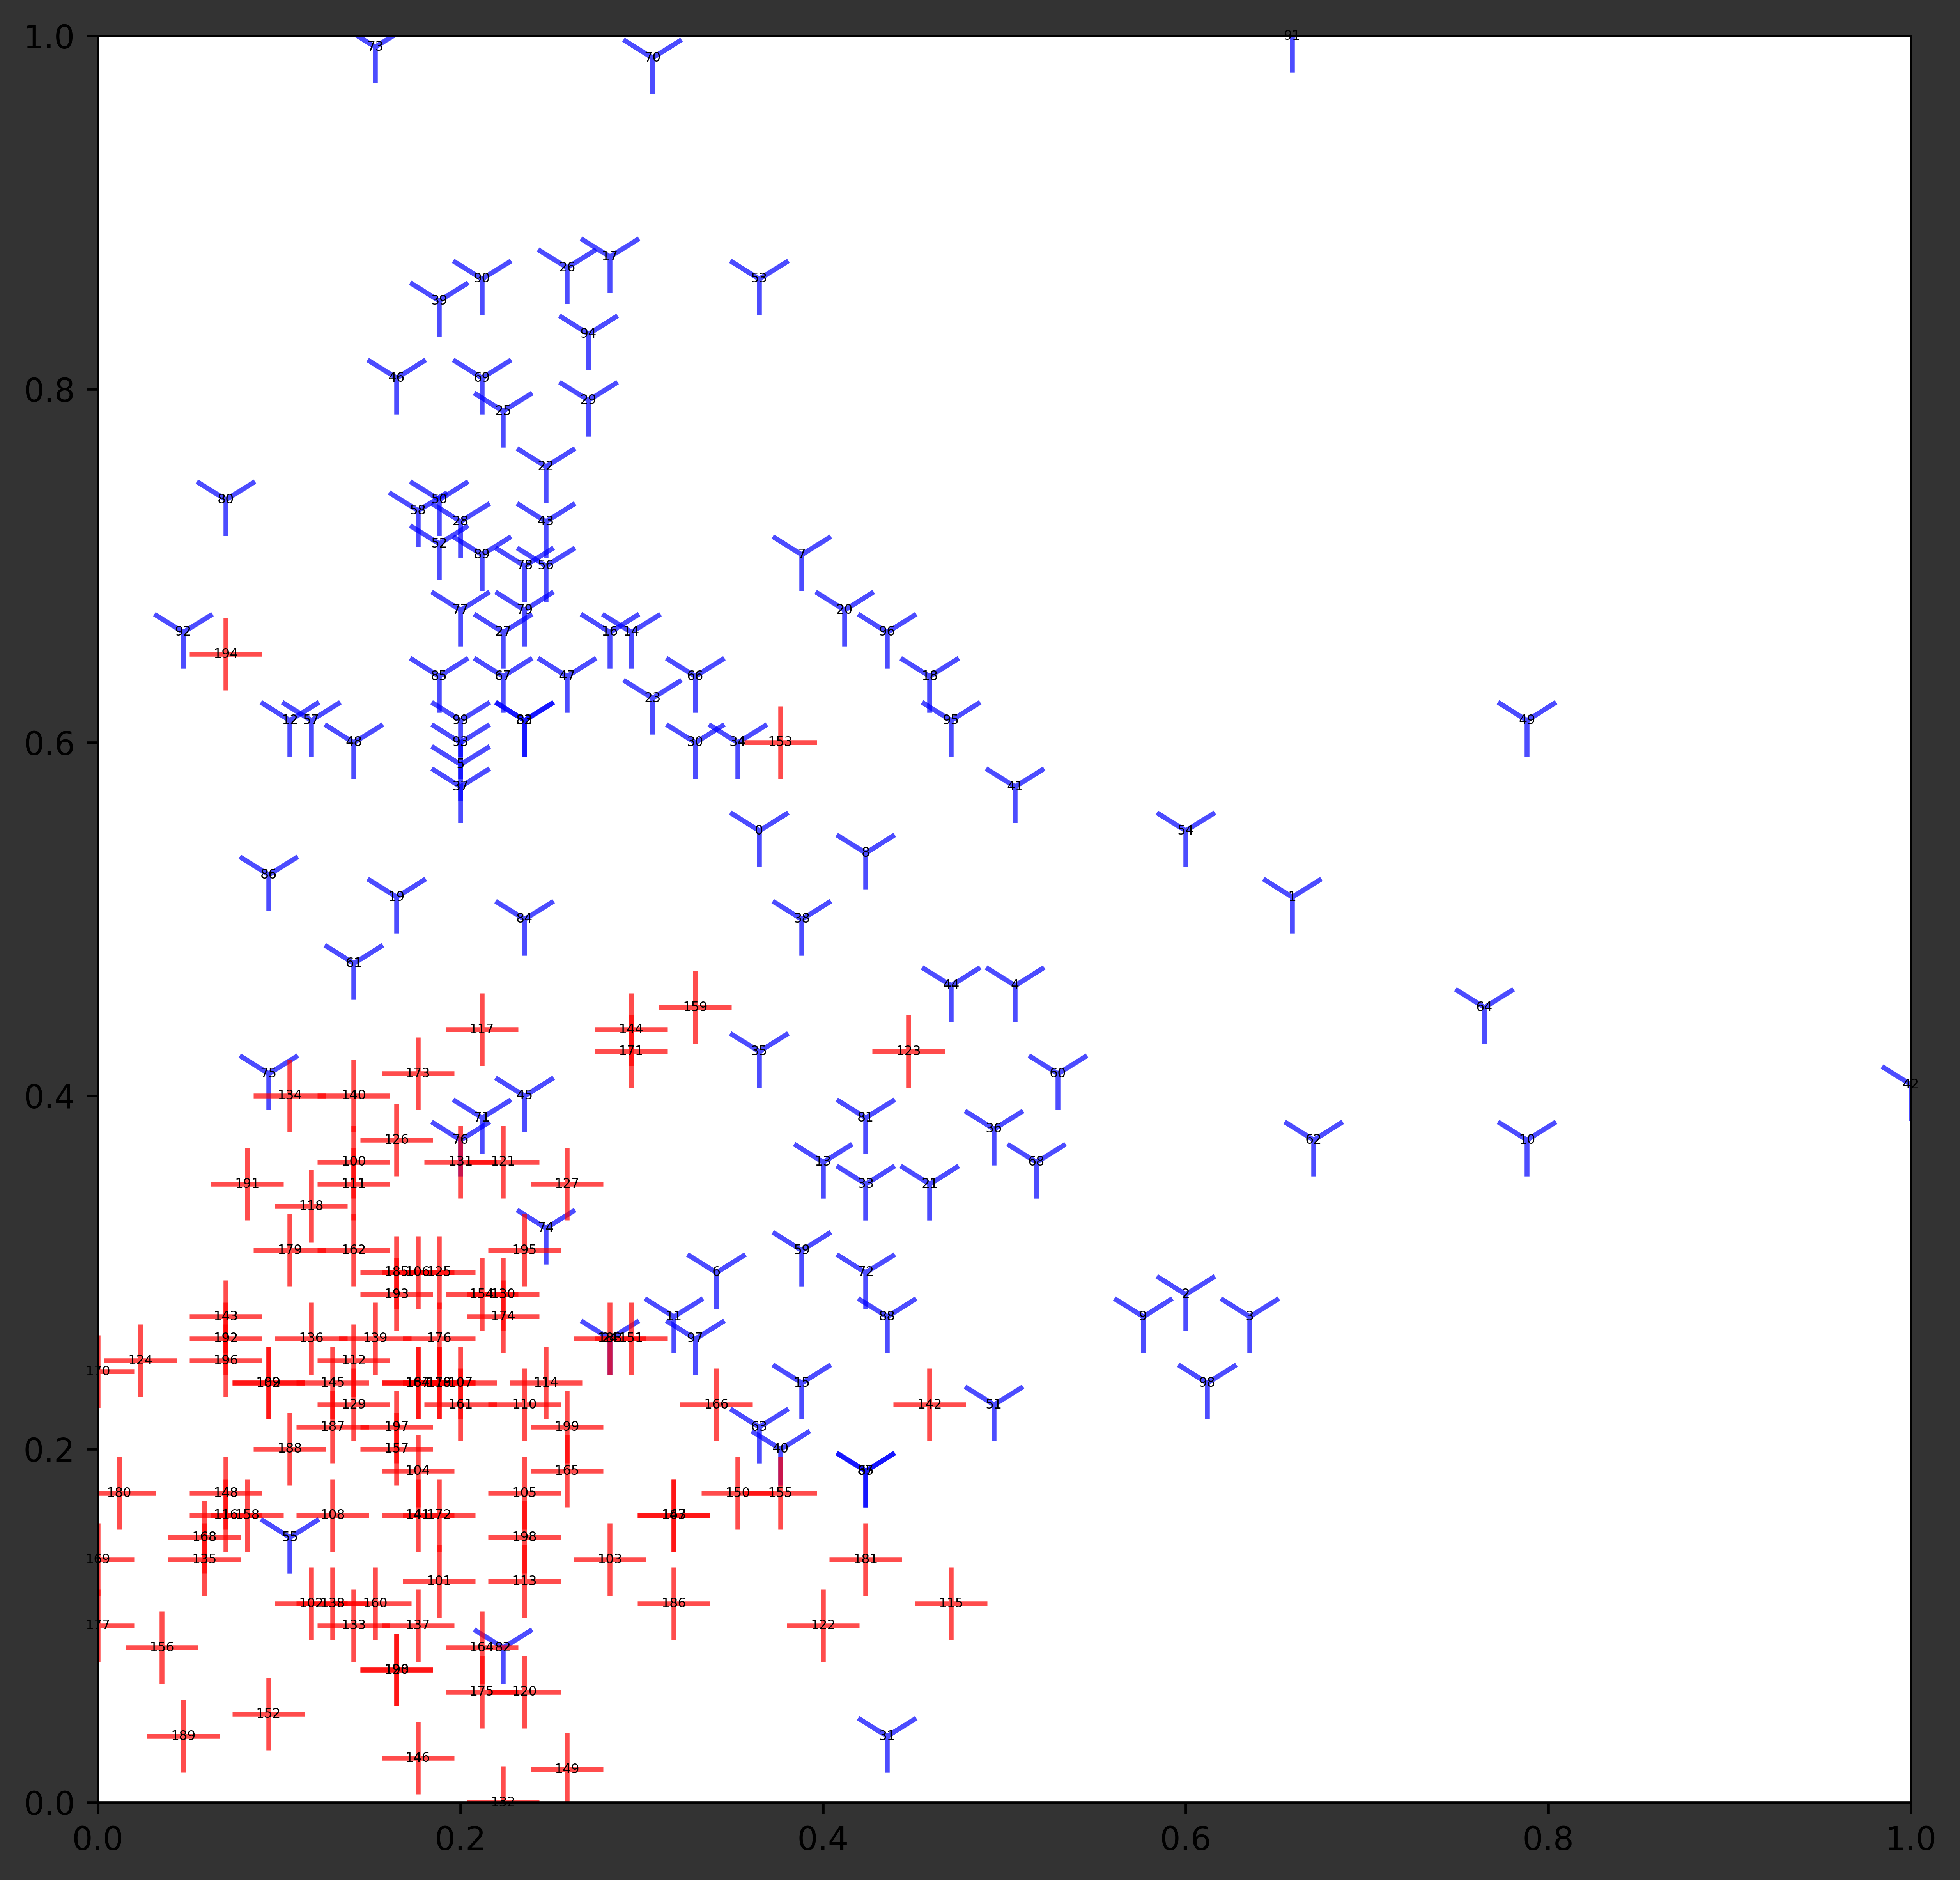

In [27]:
L = list()
plt.figure(num=1, figsize=(10, 10), dpi=600, facecolor='#333333', edgecolor='y')
for el in sorted(dd['ids']):
    """ <f1>, <f2>, <class>, <id> """
    L.append(dd[el]['data'][:])
    
    L[-1].append(dd[el]['class'])
    L[-1].append(el)
frame = np.array(L).transpose()

# frame0 = np.ma.masked_equal(frame[2], 0, copy=True)
frame0 = frame[2] == 0
plt.scatter(frame[0][frame0], frame[1][frame0], 
            c='Blue', marker='1', alpha=.7, label='Class 0', s=500)

frame0 = frame[2] == 1
plt.scatter(frame[0][frame0], frame[1][frame0], 
            c='Red', marker='+', alpha=.7, label='Class 1', s=500)

plt.xlim(0, 1)
plt.ylim(0, 1)

for item in L:
    # ax.annotate(str(item[3]), (item[0], item[1]), size=15, ha="center", )
    plt.text(x=item[0], y=item[1], s=item[3], fontsize=4, 
             horizontalalignment='center',
             verticalalignment='center',
             color='Black',
             )

# plt.

plt.savefig(
    'd:\\_NUU\\2018\\machine\\WineExp\\output_data\\fig_before_noise.pdf', 
    dpi=600,
)    
plt.show()

In [28]:
noise = data_dictionary.get_noise(dd, border)
print(f"noise obj detected:{noise}")

noise obj detected:{194, 131, 134, 74, 75, 76, 142, 82, 151, 24, 153, 155, 31, 166, 45, 117, 55, 123, 63}


In [29]:
print(f"delete noise obj from ids. \n"
      f"BEFORE: ids.len: {len(dd['ids'])}")
dd['ids'] = dd['ids'] - noise
print(f"AFTER:  ids.len: {len(dd['ids'])}")

print(f"reCALC: rel table")
dd = data_dictionary.get_rel(dd)
print(f"reCALC: nearest_opponent")
dd = data_dictionary.get_near(dd)
print(f"reCALC: border set\n"
      f"BEFORE: len:{len(border)} border: {border}")
border = data_dictionary.get_border(dd)
print(f"AFTER:  len:{len(border)} border: {border}")


delete noise obj from ids. 
BEFORE: ids.len: 200
AFTER:  ids.len: 181
reCALC: rel table
reCALC: nearest_opponent
reCALC: border set
BEFORE: len:35 border: {131, 134, 142, 151, 24, 153, 155, 158, 159, 31, 34, 35, 164, 166, 40, 173, 45, 51, 55, 183, 63, 65, 194, 195, 71, 74, 75, 76, 81, 82, 92, 117, 121, 122, 123}
AFTER:  len:15 border: {97, 65, 35, 71, 40, 11, 140, 173, 144, 115, 181, 150, 183, 121, 159}


In [30]:
# DEBUGGING
    
host_id = 142

K = dd[host_id].get('link')              # number of links to the host_if
R = dd[host_id]['nearest_opponent'][1]   # length to nearest opponent
L = 1                                    # number of friend obj with in R
print(f"K:{K}\tR:{R}")

for other_id in dd['ids']:
    if dd[host_id]['class'] == dd[other_id]['class'] and \
                    host_id != other_id and \
                    dd[host_id]['rel'][other_id] <= R:
        L += 1

try:
    # if K/L > 1:
        print(f" K = {K}, L = {L}, K/L = {K/L}")

except Exception as e:
    print(f"NOISE ERROR:   id:{host_id:4} K={K:3} L={L:3}\t{e.args}")

K:7	R:0.035294117647058976
 K = 7, L = 1, K/L = 7.0


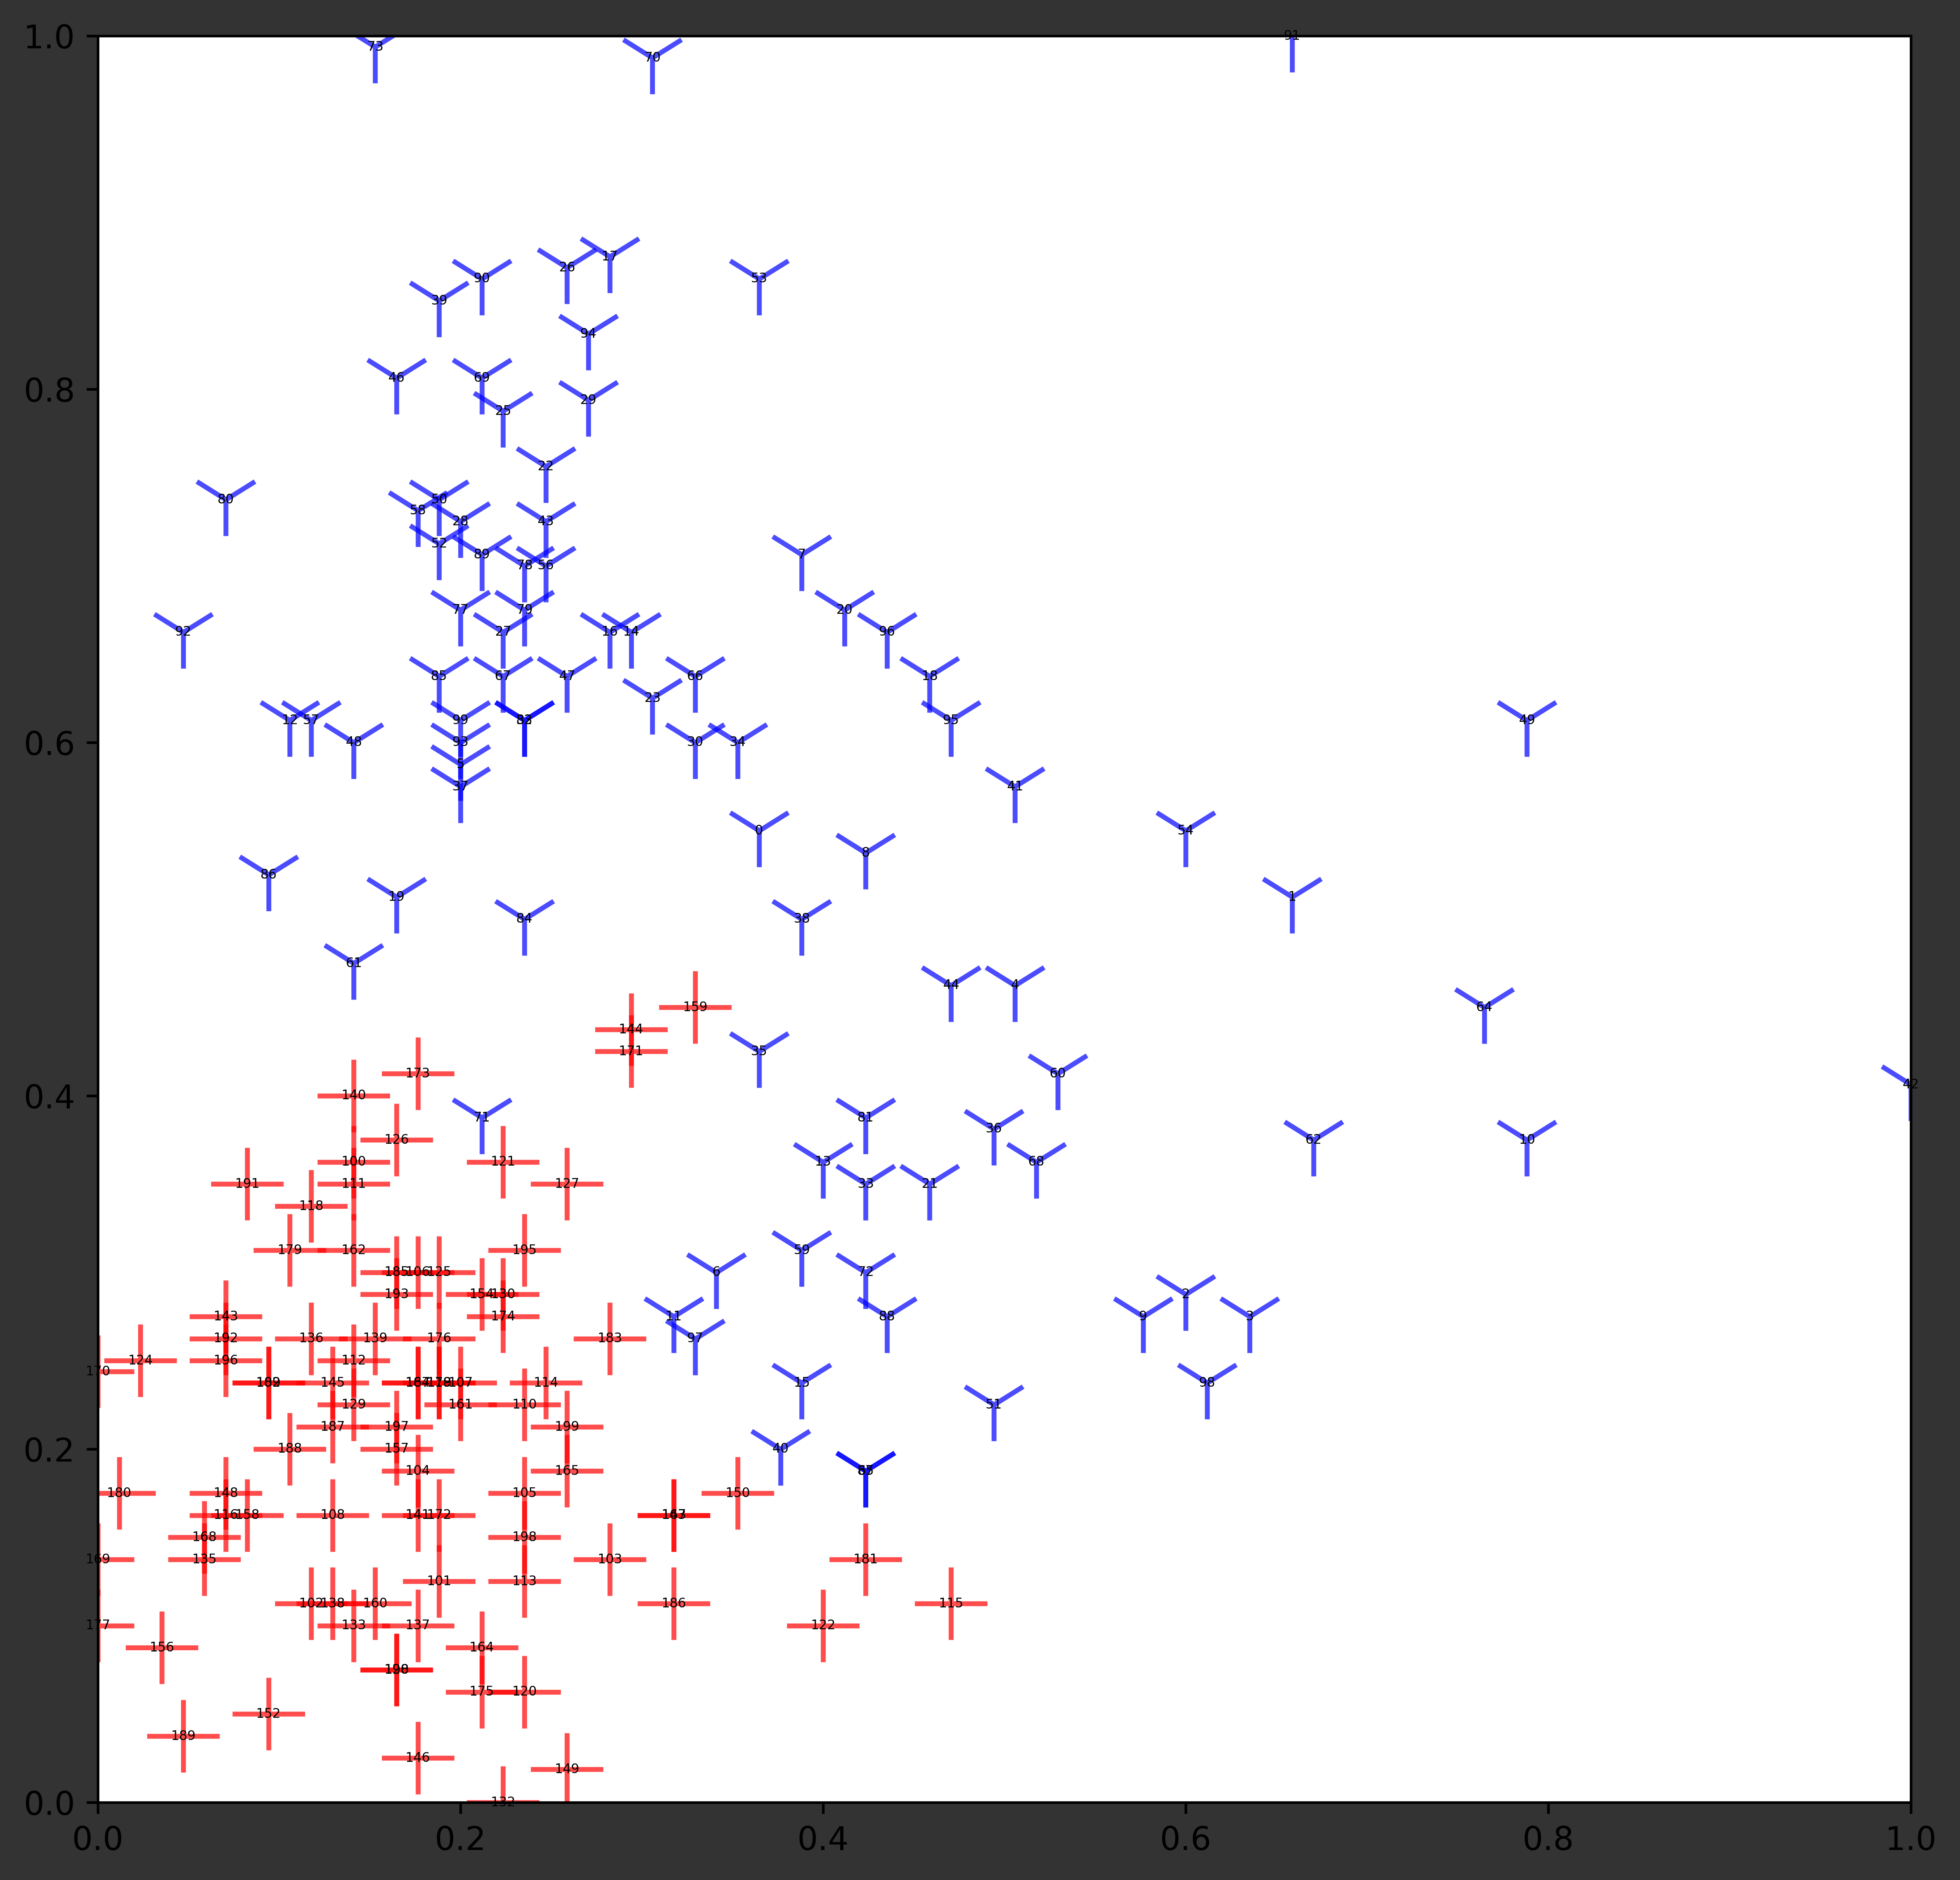

In [31]:
L = list()
plt.figure(num=1, figsize=(10, 10), dpi=600, facecolor='#333333', edgecolor='k')
for el in sorted(dd['ids']):
    """ <f1>, <f2>, <class>, <id> """
    L.append(dd[el]['data'][:])
    
    L[-1].append(dd[el]['class'])
    L[-1].append(el)
frame = np.array(L).transpose()

# frame0 = np.ma.masked_equal(frame[2], 0, copy=True)
frame0 = frame[2] == 0
plt.scatter(frame[0][frame0], frame[1][frame0], 
            c='Blue', marker='1', alpha=.7, label='Class 0', s=500)

frame0 = frame[2] == 1
plt.scatter(frame[0][frame0], frame[1][frame0], 
            c='Red', marker='+', alpha=.7, label='Class 1', s=500)

for item in L:
    plt.text(x=item[0], y=item[1], s=item[3], fontsize=4, 
             horizontalalignment='center',
             verticalalignment='center',
             color='Black',
             )

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.savefig(
    'd:\\_NUU\\2018\\machine\\WineExp\\output_data\\fig_after_noise.pdf', 
    dpi=600,
)    
plt.show()

In [32]:
# DEBUGGING

print(dd[130].get('data'))
print(dd[84]['nearest_opponent'])
print(border)
print(35 in border)
print(dd[35]['nearest_opponent'])

[0.223529411764706, 0.2875]
(144, 0.08582807007300573)
{97, 65, 35, 71, 40, 11, 140, 173, 144, 115, 181, 150, 183, 121, 159}
True
(159, 0.04325129755839056)


In [33]:
print(dd[171]['data'])
print(dd[151]['data'])
print("171 -> 84", ((7.7-7.2)**2 + (0.43-.49)**2)**.5)
print("171 -> 151", ((7.7-7.7)**2 + (0.43-.3)**2)**.5)


[0.294117647058824, 0.425]
[0.294117647058824, 0.2625]
171 -> 84 0.5035871324805669
171 -> 151 0.13


In [34]:
# L = list(dd[13]['rel'].items())
# sorted(L, key=lambda x: x[1])

In [35]:
c = 1
for el in noise:
    print(f"obj {el} K = {dd[el].get('link', 0)}", end='\t\t')
    if not c % 3: print()
    c += 1

print(f"\n\nnoise: {noise}")

obj 194 K = 25		obj 131 K = 2		obj 134 K = 2		
obj 74 K = 10		obj 75 K = 5		obj 76 K = 7		
obj 142 K = 7		obj 82 K = 16		obj 151 K = 3		
obj 24 K = 12		obj 153 K = 27		obj 155 K = 3		
obj 31 K = 2		obj 166 K = 3		obj 45 K = 3		
obj 117 K = 3		obj 55 K = 33		obj 123 K = 16		
obj 63 K = 3		

noise: {194, 131, 134, 74, 75, 76, 142, 82, 151, 24, 153, 155, 31, 166, 45, 117, 55, 123, 63}


In [36]:
# DEBUGGING

print(border)
print(dd[134]['nearest_opponent'])
print(dd[88]['nearest_opponent'])
print(dd[51]['nearest_opponent'])
print(dd[142]['rel'][88])
print(dd[142]['rel'][51])


{97, 65, 35, 71, 40, 11, 140, 173, 144, 115, 181, 150, 183, 121, 159}
(75, 0.01716561401460077)
(150, 0.12954538556203113)
(181, 0.11242308020125479)
0.05525968890604695
0.035294117647058976


In [37]:
def get_shell4(data_dict=None, border=None):
    import datetime    
    file = open('d:\\_NUU\\2018\\machine\\WineExp\\output_data\\shell4_border.data', mode='w')
    file.write(str(datetime.datetime.now()))
    file.write("\n\n")
    shell = set()
    
    error_file = open('d:\\_NUU\\2018\\machine\\WineExp\\output_data\\shell4_error.data', mode='w')
    error_file.write(str(datetime.datetime.now()))
    error_file.write("\n\n")
    
    c = 0   
    if not(data_dict or border):
        e = "ERROR: input error"
        # print(e)
        error_file.write(f"{e}:::\ndata_dict:{data_dict}; border:{border}")
        return set()
    
    for host_id in data_dict['ids']:
        
        file.write(f":: HOST ID {host_id} data:{dd[host_id]['data']}::\n")
        
        # get nearest opponent [<id>, <r>]
        near = data_dict[host_id]['nearest_opponent']
        
        file.write(f":: near {near} :::\n")
        
        # get friends
        friends = set()
        # stage 1: get all from class
        # for friend_id in data_dict['ids']:
        for friend_id in data_dict['ids']:  # border:
            if data_dict[host_id]['class'] == data_dict[friend_id]['class']:
                friends.add(friend_id)
        friends.discard(host_id)  # remove own id from friends  
        
        file.write(f":: f.len = {len(friends)} "
                   f"friends is subset of border? {friends <= border}::\n")
        
        # stage 2: get only in range
        friends_t = set()  # friends_in_range = set()
        # friends in radius
        for friend_id in friends:
            if \
                    data_dict[host_id]['rel'][friend_id] <= near[1] and \
                    data_dict[friend_id]['rel'][near[0]] < near[1]:
                friends_t.add(friend_id)
                
            if data_dict[host_id]['rel'][friend_id] < 10**-6:
                friends_t.add(friend_id)
        
        # del friends_t
        file.write(f":: in R friends.len {len(friends_t)} ::"
                   f"host in border? {host_id in border}\n")
        
        L = []
        for friend_id in friends:
            L.append((
                friend_id,
                data_dict[host_id]['rel'][friend_id],
                data_dict[friend_id]['rel'][near[0]],
                str(friend_id in border),
            ))
        
        L = sorted(L, key=lambda l: l[2])
        L2 = ''
        
        s = f"f_id, \t\th->f, \t\tf->o, \t\tin border?\n"
        file.write(s)
        for el in L:
            s = f"{el[0]:<5} {el[1]:16.5f}\t\t {el[2]:8.5f} {el[3]: >15} \n"
            file.write(s)
        
        friends = friends_t.copy()
        
        tmp = L[0]
        if len(friends_t):  # if in_R_f.len > 0
            if abs(data_dict[tmp[0]]['rel'][near[0]] - near[1]) < 10**-8:
                if host_id in border:
                    shell.add(host_id)
                elif tmp[0] in border:
                    shell.add(tmp[0])
                else:
                    e = f"ERROR: host in border? {host_id in border}; f[0] {tmp}\n"     
                    # print(e)
                    error_file.write(e)
            elif tmp[3] == 'False':
                e = f"ERROR: f_in_R.len={len(friends_t)} L[0]={tmp}\n"
                # print(e)
                error_file.write(e)
            else:
                shell.add(tmp[0])
                e = f"in R friends {friends_t}\n" \
                    f"host:{host_id} obj:{tmp}; f.len={len(L)} added into shell:{shell}\n\n"  # DEBU
                # print(e)
                error_file.write(e)
        else:  # if in_R_f.len = 0
            if host_id in border:
                shell.add(host_id)
                
                e = f"in_R_f.len={friends_t}, host in border:{host_id in border}" \
                    f"host:{host_id} obj:{tmp} added into shell:{shell}\n\n"  # DEBUG
                # print(e)
                error_file.write(e)
            else:
                shell.add(host_id)
                
                e = f"ERROR: host{host_id} data:{dd[host_id]['data']} " \
                    f"f_in_R.len={len(friends_t)} " \
                    f"host in border? {host_id in border}" \
                    f"but also added to shell:{shell}\n\n"
                # print(e)
                error_file.write(e)
        
        del near
        del host_id
        file.write('\n\n')
    
    file.close()
    error_file.close()
    return shell


shell4 = get_shell4(dd, border)
print('over')


over


In [38]:
print(f"shell4:{shell4}")

shell4:{65, 35, 38, 71, 40, 11, 173, 84, 181, 150, 183, 121, 61, 159}


In [39]:
dd[13]['data']

[0.4, 0.3625]

# CHECKING FOR SHELL
idn = 0

opps = set()
# all opps
for el in dd['ids']:
    if dd[el]['class'] != dd[idn]['class']:
        opps.add(el)
print(f"opps.len = {len(opps)}")

near = idn, float('+inf')
for el in opps:
    if near[1] > dd[idn]['rel'][el]:
        near = el, dd[idn]['rel'][el]
print(f"nearest opponent: {near}")

friends = set()
for el in dd['ids']:
    if dd[idn]['class'] == dd[el]['class']:
        friends.add(el)
friends -= {idn}
print(f"friends.len = {len(friends)}")

L = []
for el in friends:
    if dd[idn]['rel'][el] <= near[1]:
        L.append([dd[el]['rel'][idn], dd[el]['rel'][near[0]]])

print(L[:10])
for el in L:
    if el[1] < 5:
        print(el)

In [40]:
start_time = time.time()
# СОЗДАТЬ БИНАРНУЮ ТАБЛИЦУ
i = 0
host_not_border = class_is_class = less_than_r = 0

binary_dict = {'border': shell4}
# del border

for host_id in dd['ids']:
    
    binary_dict[host_id] = dict()
    
    r_nearest = dd[host_id]['nearest_opponent'][1]
    for border_id in binary_dict['border']:
        
        if host_id == border_id:
            binary_dict[host_id][border_id] = 1
            continue
    
        if dd[host_id]['class'] == dd[border_id]['class'] and \
              host_id != border_id and \
              dd[host_id]['rel'][border_id] >= r_nearest:
            
            binary_dict[host_id][border_id] = 1
        else:
            binary_dict[host_id][border_id] = 0
        
        # binary_dict[host_id] = {border_id: 1}
        
print(f"\n\n{time.time() - start_time:.10} secs")



0.0009968280792 secs


In [41]:
print(f"{time.time() - total_time:.10} secs")
print(len(binary_dict))

19.02959347 secs
182


In [42]:
# creating groups for each border obj
groups = dict()
for border_id in border:
    groups[border_id] = set()

In [43]:
print(groups)

{97: set(), 65: set(), 35: set(), 71: set(), 40: set(), 11: set(), 140: set(), 173: set(), 144: set(), 115: set(), 181: set(), 150: set(), 183: set(), 121: set(), 159: set()}


In [44]:
for idn in dd['ids']:
    # binar = binary_dict[idn]
    for key in groups.keys():
        if binary_dict[idn][key]:
            groups[key].add(idn)

KeyError: 97

In [45]:
for g in groups.items():
    print(g)

(97, set())
(65, set())
(35, set())
(71, set())
(40, set())
(11, set())
(140, set())
(173, set())
(144, set())
(115, set())
(181, set())
(150, set())
(183, set())
(121, set())
(159, set())


In [46]:
groups_t = groups.copy()
groups2 = groups_t.copy()
# groups2 = {}
g = 0
dirty = True
while dirty:
    dirty = False
    keys = list(groups2.keys())
    for host_key in keys:
        # print(f"host_key: {host_key}", end=" ")
        for other_key in keys:
            # print(f"other_key: {other_key}; ", end=" ")
            if host_key == other_key: 
                # print('continue', end='\t')
                continue
            if groups2[host_key] & groups2[other_key]:
                groups2[host_key] = groups2[host_key] | groups2[other_key]
                # print(f"host_key={host_key}; other{other_key}")
                # print(f'del groups[{other_key}]')
                del groups2[other_key]
                dirty = True
                break
        if dirty:
            # print('break2')
            break
    if dirty:
        # print('continue2')
        continue


In [47]:
g = 0
t = {}
for item in groups2.items():
    t[g] = item[1].copy()
    del groups[item[0]]
    g += 1

groups2 = dict(t)
del g

for item in groups2.items():
    print(item)

(0, set())
(1, set())
(2, set())
(3, set())
(4, set())
(5, set())
(6, set())
(7, set())
(8, set())
(9, set())
(10, set())
(11, set())
(12, set())
(13, set())
(14, set())


In [48]:
dd[35]['data']

[0.364705882352941, 0.425]

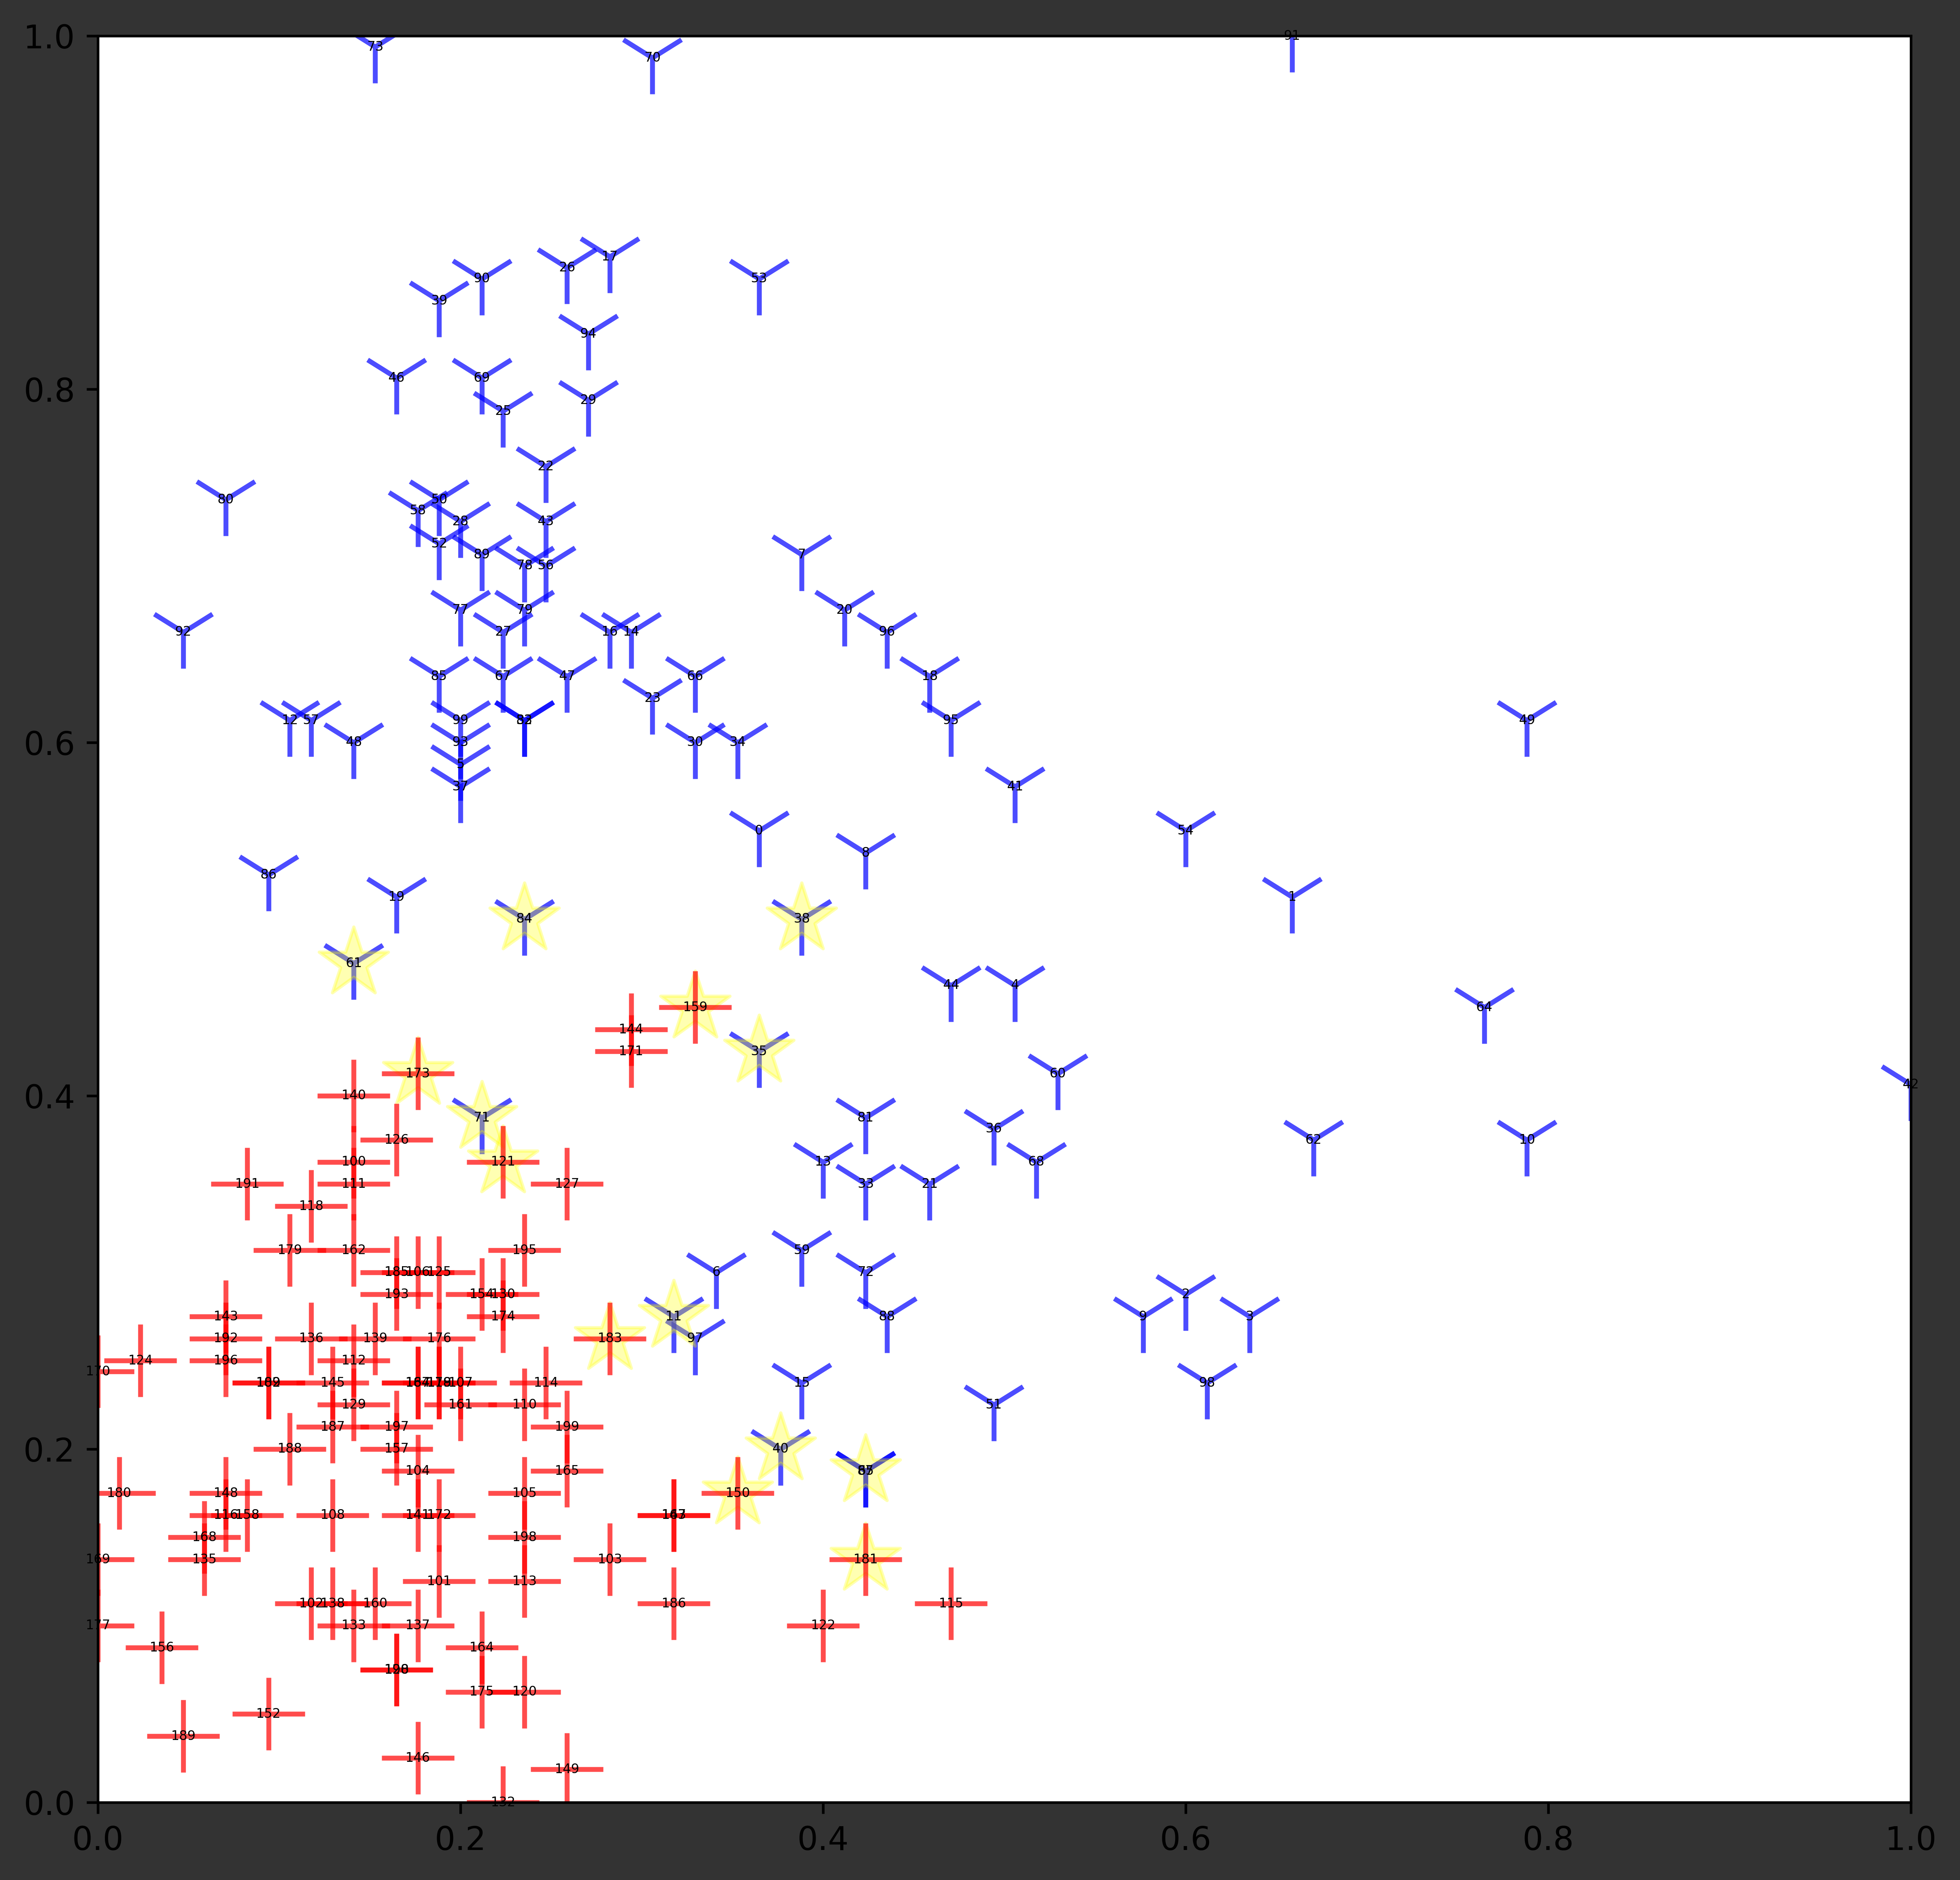

In [49]:
# НАРИСУЕМ ПЛОТ С ВЫДЕЛЕНИЕМ SHELL объектов
L = list()
plt.figure(num=1, figsize=(10, 10), dpi=600, facecolor='#333333', edgecolor='y')
for el in sorted(dd['ids']):
    """ <f1>, <f2>, <class>, <id> """
    L.append(dd[el]['data'][:])    # <f1>, <f2>
    L[-1].append(dd[el]['class'])  # <class>
    L[-1].append(el)               # <id>
    
frame = np.array(L).transpose()
# <f1>1     <f1>2       <f1>3       
# <f2>1     <f2>2       <f2>3           
# <cl>1     <cl>2       <cl>3    
# <id>1     <id>2       <id>3       
t = list()

for el in shell4:
    t.append(float(el))

# frame0 = np.ma.masked_equal(frame[2], 0, copy=True)
mask = frame[2] == 0.  # class = 0
plt.scatter(frame[0][mask], frame[1][mask], 
            c='Blue', marker='1', alpha=.7, label='Class 0', s=500)

# np.isin(element, list(test_set))

mask = np.isin(frame[3], t)  # and frame[2] == 0
# frame0 = frame[3] in t and frame[2] == 0  # shell obj of class 0
plt.scatter(frame[0][mask], frame[1][mask], 
            c='Yellow', marker='*', alpha=.3, label='Class 0', s=500)


mask = frame[2] == 1
plt.scatter(frame[0][mask], frame[1][mask], 
            c='Red', marker='+', alpha=.7, label='Class 1', s=500)
# frame0 = frame[3] in shell4 and frame[2] == 1  # shell obj of class 1
# plt.scatter(frame[0][frame0], frame[1][frame0], 
#             c='Red', marker='*', alpha=.7, label='Class 0', s=500)

plt.xlim(0, 1)
plt.ylim(0, 1)

for item in L:
    # ax.annotate(str(item[3]), (item[0], item[1]), size=15, ha="center", )
    plt.text(x=item[0], y=item[1], s=item[3], fontsize=4, 
             horizontalalignment='center',
             verticalalignment='center',
             color='Black',
             )

# plt.

plt.savefig(
    'd:\\_NUU\\2018\\machine\\WineExp\\output_data\\fig_shell.pdf', 
    dpi=600,
)    
plt.show()

In [50]:
start_time = time.time()
# СОЗДАТЬ БИНАРНУЮ ТАБЛИЦУ 2
# LIST VERSION
i = 0
host_not_border = class_is_class = less_than_r = 0

binary_list = list()

L = ['id'] + sorted(list(shell4))

binary_list.append(L)

for host_id in dd['ids']:
    L = [host_id]
    near = dd[host_id]['nearest_opponent']  # <id>, <r>
    
    for shell_id in binary_list[0][1:]:  # first row 
        
        if host_id == shell_id:
            L.append(1)
            continue
        
        if dd[host_id]['class'] == dd[shell_id]['class'] and \
           dd[host_id]['rel'][shell_id] <= near[1]:
            
            L.append(1)
        else:
            L.append(0)
    
    binary_list.append(L)
    if len(binary_list[0]) != len(L):
        print(f"ERROR:    L.len{len(L)} != shell.len{len(binary_list[0])}")
    
    
print(f"\n\n{time.time() - start_time:.10} secs")



0.0 secs


In [51]:
with open('d:\\_NUU\\2018\\machine\\WineExp\\output_data\\binary_list.data', 
          mode='w') as file:
    
    import datetime
    
    file.write(str(datetime.datetime.now()))
    file.write("\n\n")
        
    for el in binary_list:
        s = ''
        for e in el:
            s += f"{e:^5}"
        if sum(el[1:]) == 0:
            s += '\tERROR??'
        
        file.write(s)
        del s
        file.write('\n')

In [52]:
groups

{}

In [53]:
# CREATING GROUPS from binary_list

# creating subgroups for each shell obj
groups = dict()
for shell_id in shell4:
    groups[shell_id] = set()

for col in range(1, len(binary_list[1])):
    for row in range(1, len(binary_list[1:])):
        
        if sum(binary_list[row][1:]) == 0:
            if binary_list[row][0] not in groups.keys():
                print(f"sum:{sum(binary_list[row][1:])} "
                      f"data:{binary_list[row]}")
            groups[binary_list[row][0]] = set()
            groups[binary_list[row][0]].add(binary_list[row][0])
            continue
        
        if binary_list[row][col] == 1:
            groups[ binary_list[0][col] ].add(binary_list[row][0])

sum:0 data:[42, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum:0 data:[98, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [54]:
groups2 = groups.copy()
# groups2 = {}
print(f"\n count of groups = {len(groups.items())}")
g = 0
dirty = True
while dirty:
    dirty = False
    keys = list(groups2.keys())
    for host_key in keys:
        # print(f"host_key: {host_key}", end=" ")
        for other_key in keys:
            # print(f"other_key: {other_key}; ", end=" ")
            if host_key == other_key: 
                # print('continue', end='\t')
                continue
            if groups2[host_key] & groups2[other_key]:
                groups2[host_key] = groups2[host_key] | groups2[other_key]
                del groups2[other_key]
                dirty = True
                break
        if dirty:
            # print('break2')
            break
    if dirty:
        # print('continue2')
        continue
groups = groups2.copy()


 count of groups = 16


In [55]:
groups_list = []
for g in groups.items():
    # groups_list.append([g[0], g[1]])
    groups_list.append(g[1])

# SORTING by len of elements
# groups_list = sorted(groups_list, key=lambda x: len(x[1]), reverse=True)
groups_list = sorted(groups_list, key=lambda x: len(x), reverse=True)

for g in groups_list:
    print(g)

print(f"\n count of groups = {len(groups_list)}")


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99}
{100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 132, 133, 135, 136, 137, 138, 139, 140, 141, 143, 145, 146, 147, 148, 149, 150, 152, 154, 156, 157, 158, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198}
{144, 171, 159}
{71}
{42}
{98}

 count of groups = 6


Формула для проверки компактности 
# $\Theta_i = \sum_{j=1}^{\mu} \frac{m_{i j}^2}{m_i^2}$, где 
### i = нормер класса, 
### j = номер группы,
### $m_i = $ число объектов в классе,
### $m_{i j} = $ число объектов j-ой группы i-го класса

In [56]:
# проверка КОМПАКТНОСТИ

# mi  число obj в классе
# mij число obj в группе
for i in [0, 1]:
    mi = sum([1 if dd[host_id]['class'] == i else 0 for host_id in dd['ids']])
    summa = 0.
    for j, g in enumerate(groups_list):
        if dd[next(iter(g))]['class'] != i:
            continue
        mij = len(g)
        summa += mij**2
    Qi = summa/(mi**2)
    print(f"class={i}, Qi={Qi:1.4}")


class=0, Qi=0.9355
class=1, Qi=0.9142


In [57]:
# ordered_list = []
# WORKING IN EACH GROUP SEPARATELY
group_etalons_list = []
for group in groups_list:
    
    group_etalons = group.copy()
    
    ordered_list = list()  # For list of elements ordered by R to nearest_opponent
    for host_id in group:
        #  ordered_list[ <id>, <R> <etalon> ] :
        #                <id>     - id of group element;
        #                <R>      - R to nearest_element;  # for sorting
        #                <etalon> - is this obj etalon?
        ordered_list.append([ 
            host_id, 
            dd[host_id]['nearest_opponent'][1], 
            1 
        ])
    
    # Sorting all elements by R to nearest_opponent
    ordered_list = sorted(ordered_list, key=lambda x: x[1], reverse=False)

    # WORKING ON EACH ELEMENT OF GROUP
    for n, item in enumerate(ordered_list):
        
        # temporary delete from group_etalons  # ordered_list[n][2] = 0
        print(f"del [{item[0]}]", end="\t")
        group_etalons.discard(item[0])
        
        # CHECK for errors on change etalon_label
        for notetalon_id in group - group_etalons:
            relation_table = []
            for other_id in dd['ids'] - \
                    (group - group_etalons) - \
                    {notetalon_id, }:
                # other_id: any, except notetalon objects
                relation_table.append([                 # 
                    other_id,                           # id 
                    dd[notetalon_id]['rel'][other_id],  # R to other_id
                ])
            minimum = min(relation_table, key=lambda x: x[1])
            
            if dd[notetalon_id]['class'] != dd[minimum[0]]['class']:
                print(
                    f"ERROR: n{n} NotEtalon{notetalon_id}, "
                    f"minimum{minimum}", end='\t')
                group_etalons.add(item[0])
            else: 
                print('!', end='')
    
    group_etalons_list.append(group_etalons)        
    print(f"\nGROUP ETALONS: {group_etalons}")

del [40]	ERROR: n0 NotEtalon40, minimum[150, 0.034331228029202326]	del [11]	!del [35]	ERROR: n2 NotEtalon35, minimum[159, 0.04325129755839056]	!del [97]	!!del [65]	!!!del [87]	!!!!del [6]	!ERROR: n6 NotEtalon97, minimum[183, 0.04705882352941104]	!!!del [61]	!!!!!del [15]	!!!!!!del [38]	!!!!!!!del [84]	!!!!!!!!del [19]	!!!!!!!!!del [0]	!!!!!!!!!!del [51]	!!!!!!!!!!!del [13]	!!!!!!!!!!!!del [81]	!!!!!!!!!!!!!del [59]	!!!!!!!!!!!!!!del [8]	!!!ERROR: n17 NotEtalon38, minimum[159, 0.07720238087298073]	!!!!!!!!!!!del [88]	!!!!!!!!!!!!!!!del [86]	!!!!!!!!!!!!!!!ERROR: n19 NotEtalon61, minimum[173, 0.071776909521687]	del [33]	!!!!!!!!!!!!!!!!del [44]	!!!!!!!!!!!!!!!!!del [72]	!!!!!!!!!!!!!!!!!!del [30]	!!!!!!!!!!!!!!!!!!!del [34]	!!!!!!!!!!!!!!!!!!!!del [21]	!!!!!!!!!!!!!!!!!!!!!del [37]	!!!!!!!!!!!!!!!!!!ERROR: n26 NotEtalon84, minimum[144, 0.08582807007300573]	!!!del [23]	!!!!!!!!!!!!!!!!!!!!!!del [5]	!!!!!!!!!!!!!!!!!!!!!!!del [4]	!!!!!!!!!!!!!!!!!!!!!!!!del [36]	!!!!!!!!!!!!!!!!!!!!!!!!!de

In [58]:
group_etalons_list

[{6, 8, 9, 35, 37, 40, 86},
 {121, 122, 140, 150, 183},
 {144},
 {71},
 set(),
 set()]

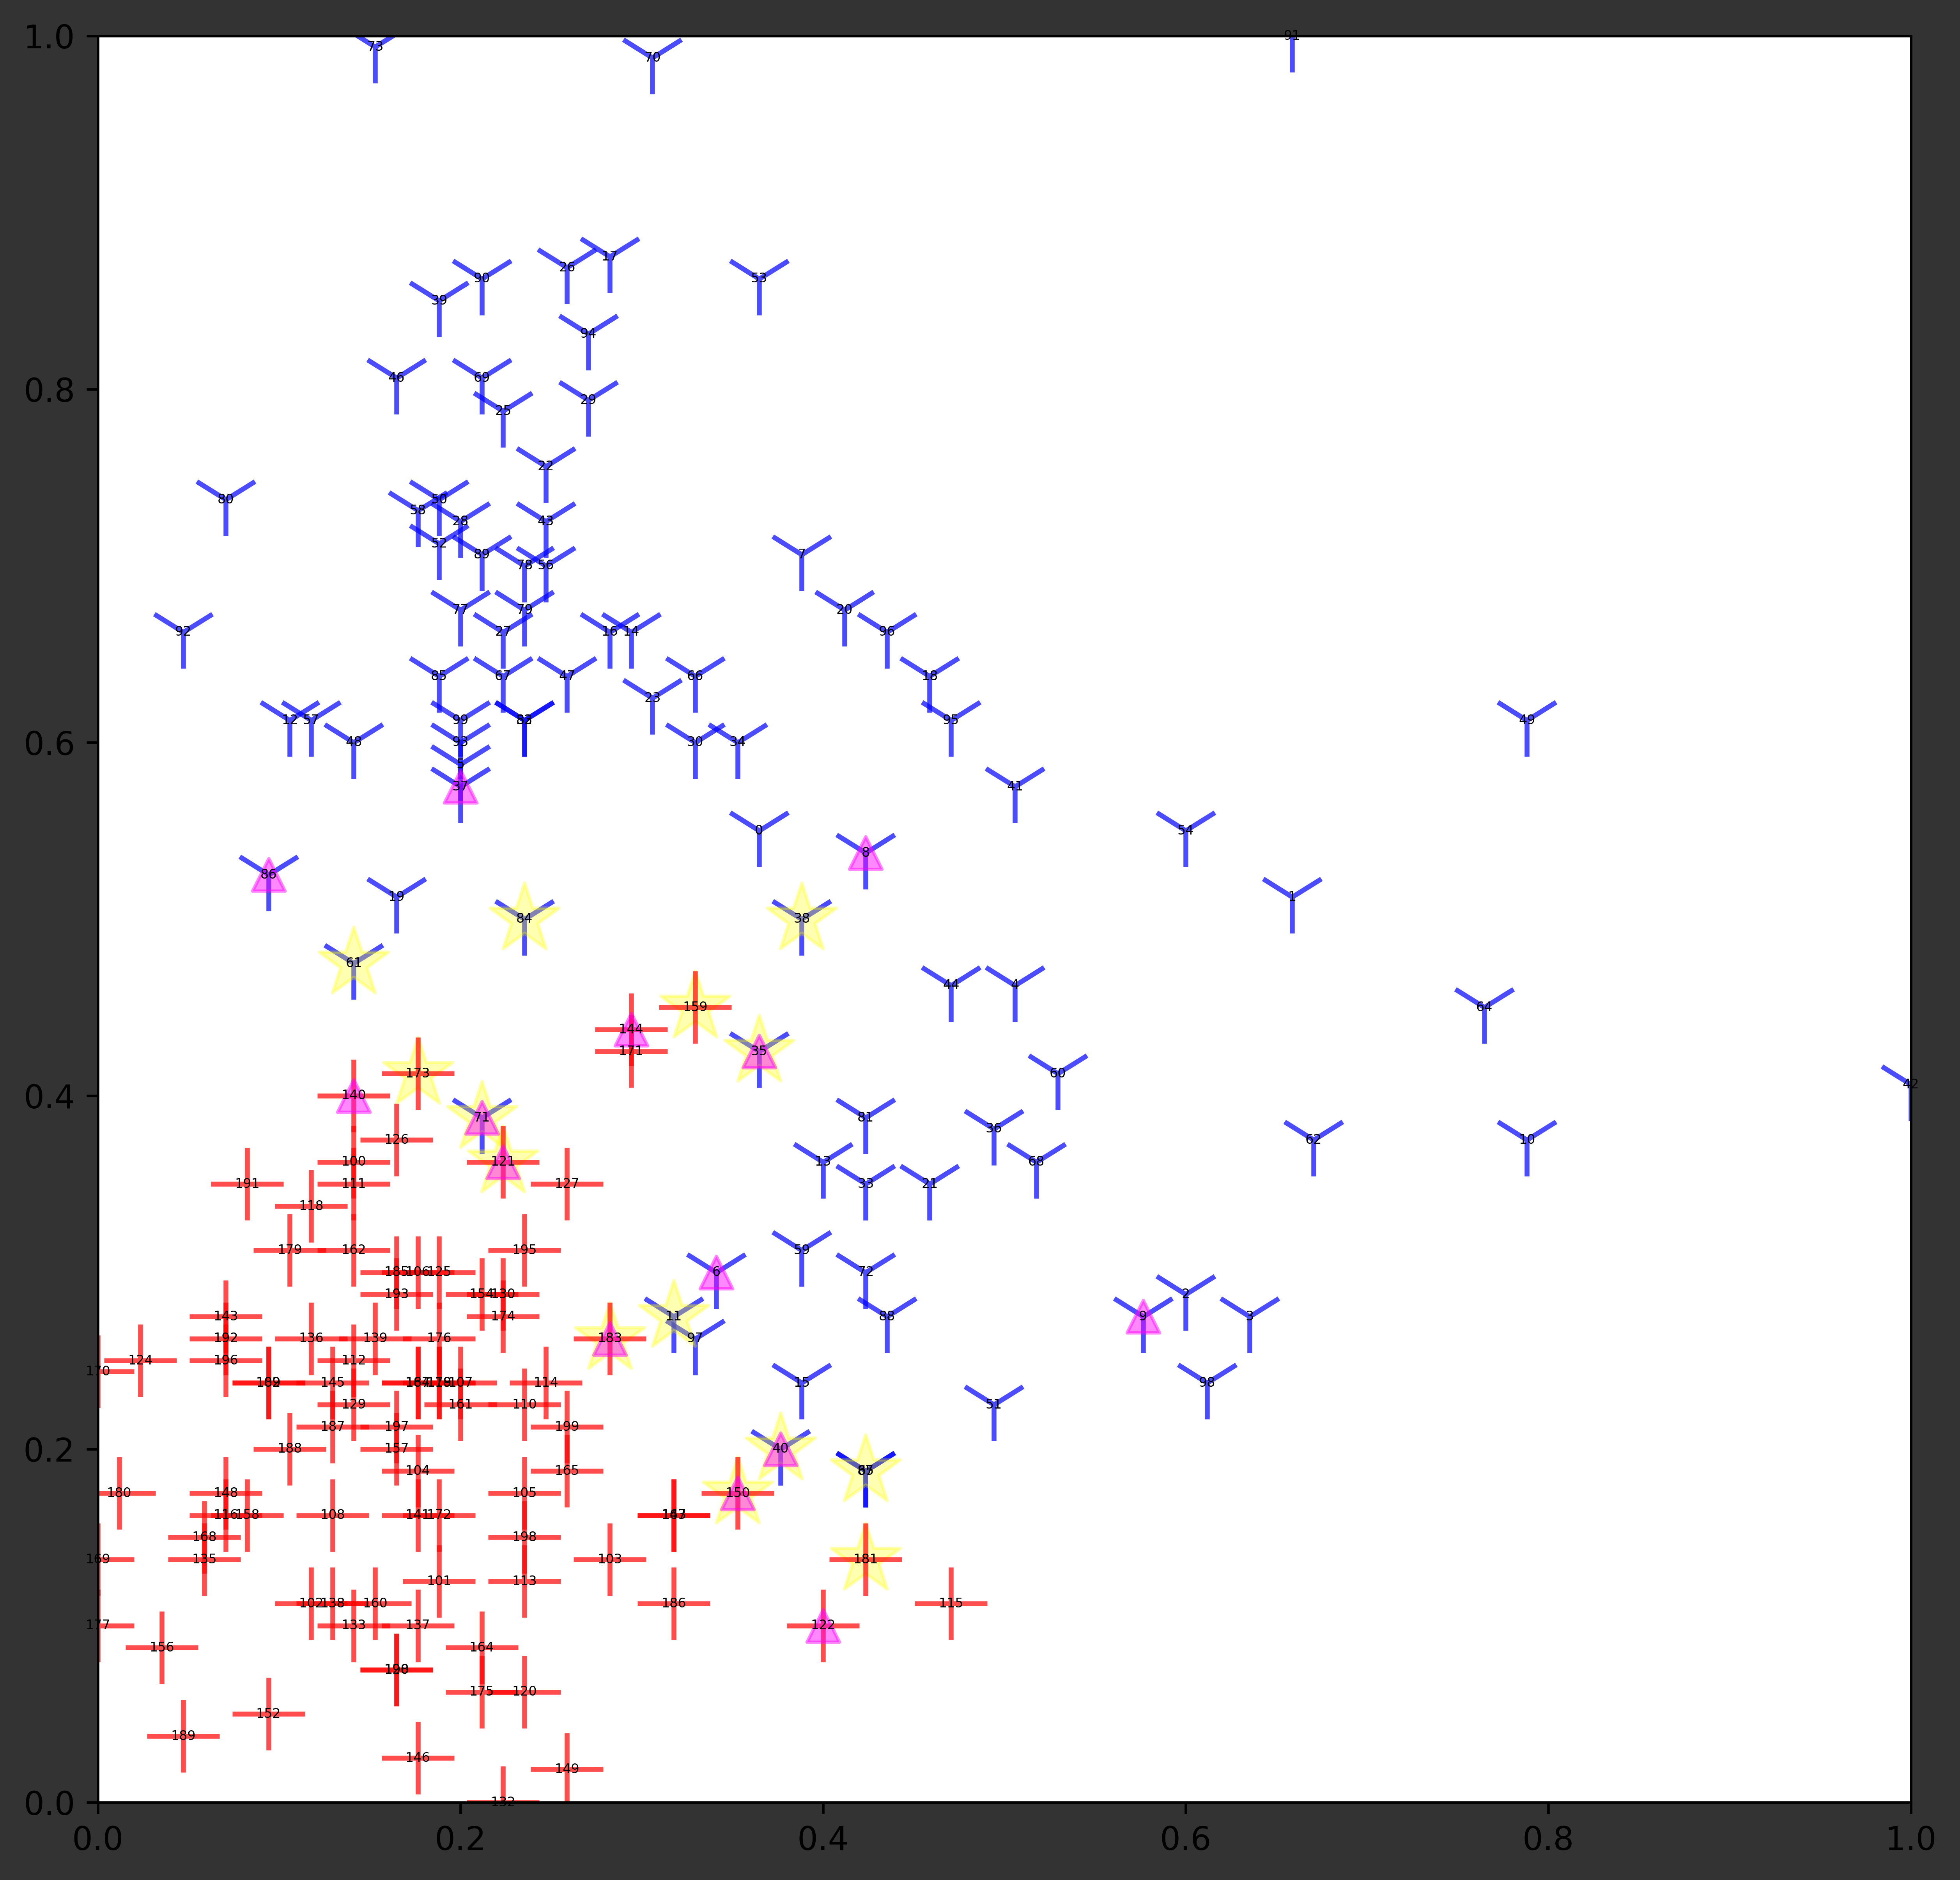

In [59]:
# НАРИСУЕМ ПЛОТ С ВЫДЕЛЕНИЕМ SHELL объектов
L = list()
plt.figure(num=1, figsize=(10, 10), dpi=600, facecolor='#333333', edgecolor='y')
for el in sorted(dd['ids']):
    """ <f1>, <f2>, <class>, <id> """
    L.append(dd[el]['data'][:])    # <f1>, <f2>
    L[-1].append(dd[el]['class'])  # <class>
    L[-1].append(el)               # <id>
    
frame = np.array(L).transpose()
# <f1>1     <f1>2       <f1>3       
# <f2>1     <f2>2       <f2>3           
# <cl>1     <cl>2       <cl>3    
# <id>1     <id>2       <id>3       
t = list()

for el in shell4:
    t.append(float(el))

# frame0 = np.ma.masked_equal(frame[2], 0, copy=True)
mask = frame[2] == 0.  # class = 0
plt.scatter(frame[0][mask], frame[1][mask], 
            c='Blue', marker='1', alpha=.7, label='Class 0', s=500)

# np.isin(element, list(test_set))

mask = np.isin(frame[3], t)  # and frame[2] == 0
# frame0 = frame[3] in t and frame[2] == 0  # shell obj of class 0
plt.scatter(frame[0][mask], frame[1][mask], 
            c='Yellow', marker='*', alpha=.3, label='Class 0', s=500)


mask = frame[2] == 1
plt.scatter(frame[0][mask], frame[1][mask], 
            c='Red', marker='+', alpha=.7, label='Class 1', s=500)
# frame0 = frame[3] in shell4 and frame[2] == 1  # shell obj of class 1
# plt.scatter(frame[0][frame0], frame[1][frame0], 
#             c='Red', marker='*', alpha=.7, label='Class 0', s=500)

plt.xlim(0, 1)
plt.ylim(0, 1)

for item in L:
    # ax.annotate(str(item[3]), (item[0], item[1]), size=15, ha="center", )
    plt.text(x=item[0], y=item[1], s=item[3], fontsize=4, 
             horizontalalignment='center',
             verticalalignment='center',
             color='Black',
             )

# SELECT ETALON OBJECTS
etalons = []
for group in group_etalons_list:
    for el in group:
        etalons.append(float(el))
    
mask = np.isin(frame[3], etalons) 
plt.scatter(frame[0][mask], frame[1][mask], 
            c='#FF00FF77', marker='^', label='Class 0', s=100)

plt.savefig(
    'd:\\_NUU\\2018\\machine\\WineExp\\output_data\\fig_etalon.pdf', 
    dpi=600,
)    
plt.show()

In [ ]:
print(f"{time.time() - total_time:.10} secs")